In [2]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Ab hier alles analog zum Notebook von Konni 

In [3]:
path_data = "./dataset/"
filename = "all_data_updated.csv"
data = pd.read_csv(os.path.join(path_data, filename))

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,device,hive number,date,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,file name,queen presence,queen acceptance,frames,target,time,queen status
0,1,5,2022-06-08 14:52:28,36.42,30.29,1007.45,26.68,52,1013,8.75,NaN,711,75,0,37.29,-121.95,2022-06-08--14-52-28_1.raw,1,2,8,0,0.583,0
1,1,5,2022-06-08 15:51:41,33.56,33.98,1006.93,25.99,53,1012,10.29,NaN,803,75,0,37.29,-121.95,2022-06-08--15-51-41_1.raw,1,2,8,0,0.625,0
2,1,5,2022-06-08 17:21:53,29.01,42.73,1006.68,24.49,56,1012,8.75,NaN,803,75,0,37.29,-121.95,2022-06-08--17-21-53_1.raw,0,0,8,1,0.708,1
3,1,5,2022-06-08 18:20:59,30.51,36.74,1006.68,22.97,59,1012,8.23,10.29,803,75,0,37.29,-121.95,2022-06-08--18-20-59_1.raw,0,0,8,1,0.750,1
4,1,5,2022-06-08 19:20:04,30.32,35.55,1006.58,21.52,61,1012,7.20,NaN,803,75,0,37.29,-121.95,2022-06-08--19-20-04_1.raw,0,0,8,1,0.792,1


In [5]:
data.describe()

,device,hive number,hive temp,hive humidity,hive pressure,weather temp,weather humidity,weather pressure,wind speed,gust speed,weatherID,cloud coverage,rain,lat,long,queen presence,queen acceptance,frames,target,time,queen status
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1271.000000,1275.000000,1275.000000,1271.000000,281.000000,1275.000000,1275.000000,1275.0,1.271000e+03,1271.00,1275.000000,1275.000000,1275.00000,1275.000000,1275.000000,1275.000000
mean,1.554510,2.709020,29.009475,44.663890,1009.179169,20.326845,63.501176,1011.370196,3.805452,4.511317,795.941176,27.868235,0.0,3.729000e+01,-121.95,0.876078,1.549020,9.10902,3.396863,0.482972,2.127843
std,0.497215,1.488587,8.172418,18.359731,2.406004,5.587868,16.207222,56.807873,2.311196,3.931787,47.263969,33.641333,0.0,7.108224e-15,0.00,0.329621,0.704151,0.99443,1.586142,0.287396,1.096649
min,1.000000,1.000000,15.500000,7.230000,1003.540000,10.750000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,0.0,3.729000e+01,-121.95,0.000000,0.000000,8.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,22.455000,32.245000,1007.375000,15.480000,51.000000,1013.000000,2.060000,1.340000,800.000000,0.000000,0.0,3.729000e+01,-121.95,1.000000,1.000000,8.00000,3.000000,0.250000,1.000000
50%,2.000000,3.000000,27.910000,42.180000,1009.170000,19.280000,66.000000,1014.000000,3.600000,2.680000,801.000000,20.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,3.000000,0.500000,3.000000
75%,2.000000,4.000000,33.075000,54.945000,1010.705000,24.850000,78.000000,1016.000000,5.660000,7.600000,802.000000,40.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,5.000000,0.750000,3.000000
max,2.000000,5.000000,55.620000,93.470000,1015.970000,35.430000,88.000000,1021.000000,10.800000,15.430000,804.000000,100.000000,0.0,3.729000e+01,-121.95,1.000000,2.000000,10.00000,5.000000,0.958000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   device            1275 non-null   int64  
 1   hive number       1275 non-null   int64  
 2   date              1275 non-null   object 
 3   hive temp         1275 non-null   float64
 4   hive humidity     1275 non-null   float64
 5   hive pressure     1275 non-null   float64
 6   weather temp      1271 non-null   float64
 7   weather humidity  1275 non-null   int64  
 8   weather pressure  1275 non-null   int64  
 9   wind speed        1271 non-null   float64
 10  gust speed        281 non-null    float64
 11  weatherID         1275 non-null   int64  
 12  cloud coverage    1275 non-null   int64  
 13  rain              1275 non-null   int64  
 14  lat               1271 non-null   float64
 15  long              1271 non-null   float64
 16  file name         1275 non-null   object 


array([[<Axes: title={'center': 'device'}>,
        <Axes: title={'center': 'hive number'}>,
        <Axes: title={'center': 'hive temp'}>,
        <Axes: title={'center': 'hive humidity'}>,
        <Axes: title={'center': 'hive pressure'}>],
       [<Axes: title={'center': 'weather temp'}>,
        <Axes: title={'center': 'weather humidity'}>,
        <Axes: title={'center': 'weather pressure'}>,
        <Axes: title={'center': 'wind speed'}>,
        <Axes: title={'center': 'gust speed'}>],
       [<Axes: title={'center': 'weatherID'}>,
        <Axes: title={'center': 'cloud coverage'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'queen presence'}>,
        <Axes: title={'center': 'queen acceptance'}>,
        <Axes: title={'center': 'frames'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'queen s

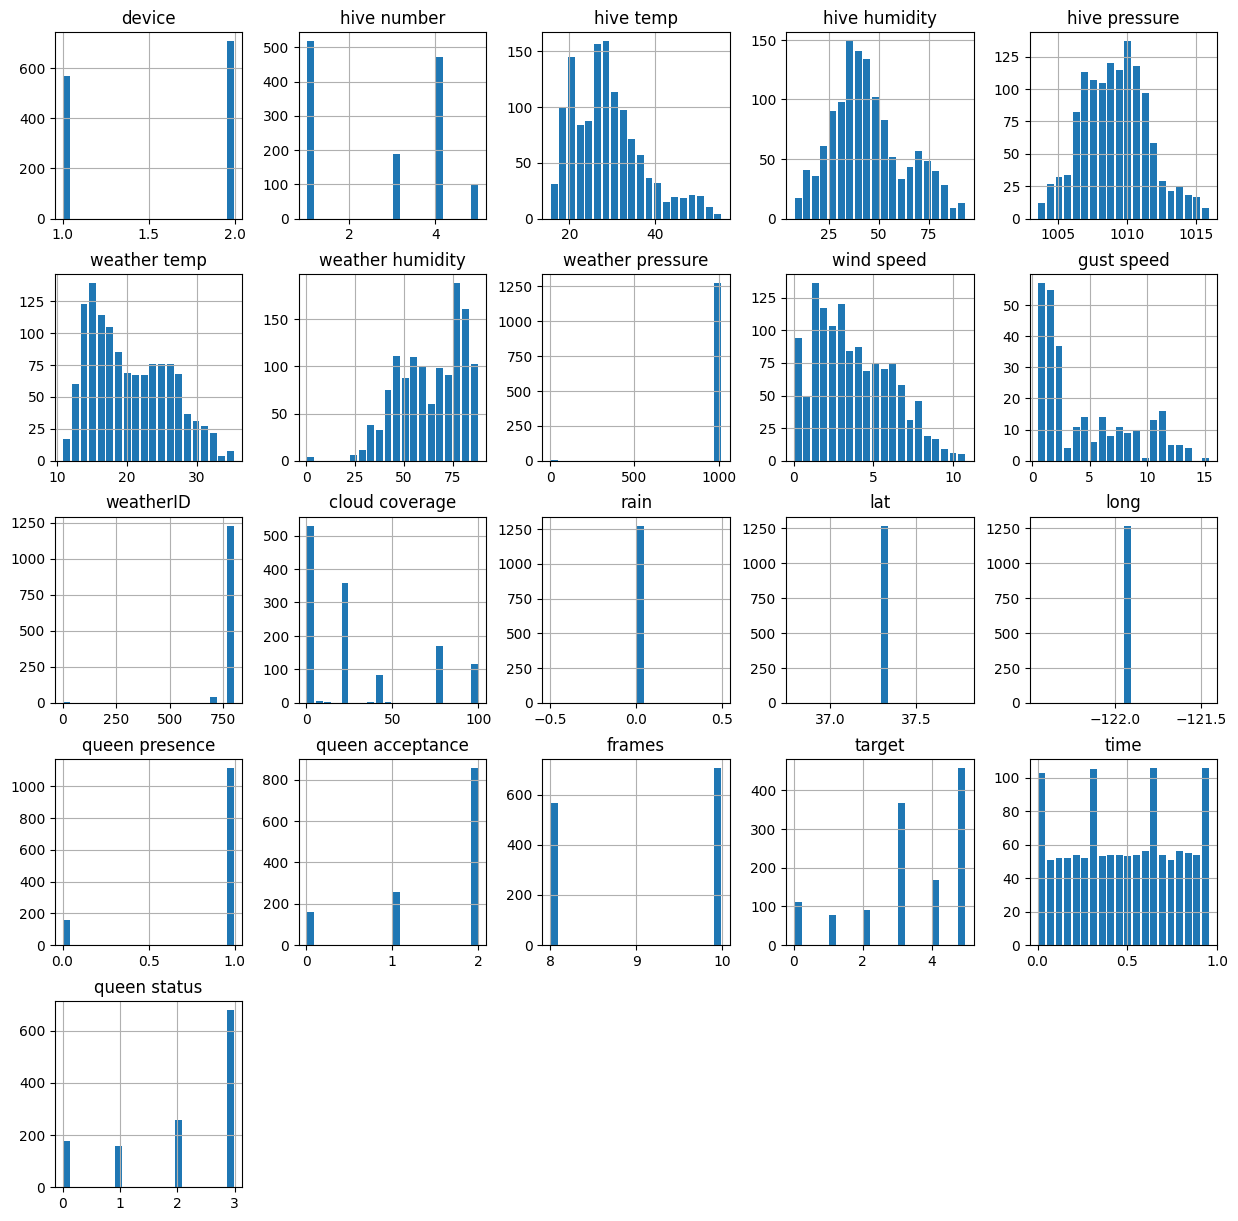

In [7]:
data.hist(figsize=(15, 15), bins=20, rwidth=0.8)

In [8]:
data_cleaned = data.drop(columns=["gust speed", "long"])
data_cleaned = data_cleaned.dropna()

In [9]:
data_cleaned["date"] = pd.to_datetime(
    data_cleaned["date"], format='%Y-%m-%d %H:%M:%S')
data_cleaned["file name"] = data_cleaned["file name"].astype("string")

# Ab hier nicht mehr analog zum Notebook von Konni

lat und rain sind auch für alle Einträge gleich und können entfernt werden

In [19]:
data_cleaned = data_cleaned.drop(columns=["lat", "rain"])

Queen status is a combined value for queen presence and acceptance \
(0 - queenright/original queen, 1 - not present, 2 - present and rejected, 3 - present and newly accepted)

In [20]:
data_cleaned["queen status"].value_counts()

queen status
3    678
2    258
0    177
1    158
Name: count, dtype: int64

In [23]:
data_cleaned_numeric = data_cleaned.select_dtypes(include=[np.number])

<Axes: >

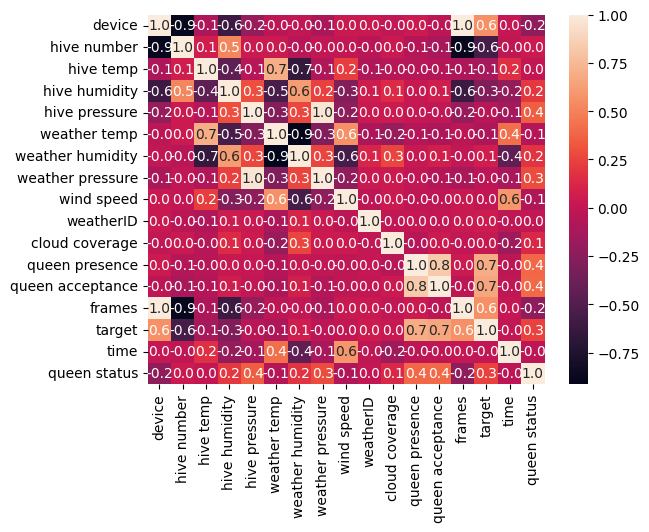

In [26]:
sb.heatmap(data_cleaned_numeric.corr(), annot=True, fmt=".1f")

--> Hive number und frames korrelieren stark (ergibt Sinn, weil je zwei Hives im Datensatz gleich viele Frames haben und es nur zwei verschiedene Werte für Frames gibt)

In [35]:
data_cleaned.groupby("hive number")["frames"].value_counts()

hive number  frames
1            10        516
3            10        188
4            8         471
5            8          96
Name: count, dtype: int64

--> device und frames auchm, weil je nach Anzahl der Frames ein anderes Device eingesetzt wurde

In [36]:
data_cleaned.groupby("device")["frames"].value_counts()

device  frames
1       8         567
2       10        704
Name: count, dtype: int64

--> hive number und device auch, weil ein device für genau 2 hives eingesetzt wurde

In [37]:
data_cleaned.groupby("hive number")["device"].value_counts()

hive number  device
1            2         516
3            2         188
4            1         471
5            1          96
Name: count, dtype: int64

--> queen presence und quuen acceptance hängen logisch zusammen (nur wenn eine Königin da ist, kann sie auch akzeptiert sein; beide beschreiben den Zustand des Bienenvolkes) und korrelieren daher auch recht stark

--> Weather temperature und wather humidity korrelieren auch stark

**Potenzielle Targets für ein Machine-Learning Modell, das als Input Audio-Dateien bekommt**

- queen presence, queen acceptance oder beide kombiniert als queen status oder target
- alles, was mit Wetter zu tun hat
- hive temp, hive humidity und hive pressure